## **Bibliotecas**

In [5]:
# Bibliotecas para importação e análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import geopandas as gpd
import unicodedata
import re
import random
import requests
from datetime import datetime, timedelta

In [2]:
# Bibliotecas para ML/Deep Learning
!pip install unicodedata

## **Importação dos dados**

In [6]:
# Carregamento das bases de dados para o Pandas
path_combs = r'C:\Users\Colaborador\Desktop\TCC\Datasets'
path_dolar = r'C:\Users\Colaborador\Desktop\TCC\USD_BRLdata.csv'

#path_combs = r'C:\Users\Emanuel\Desktop\PUCMG\TCC\Datasets'
#path_dolar = r'C:\Users\Emanuel\Desktop\PUCMG\TCC\USD_BRLdata.csv'

### PREÇOS DE COMBUSTÍVEIS

files = glob.glob(path_combs + '/*.csv')
many_dfs = [pd.read_csv(file, sep=';') for file in files]
df_combs = pd.concat(many_dfs, ignore_index=False)

### COTAÇÃO DO DÓLAR

df_dolar = pd.read_csv(path_dolar, sep=',')

In [7]:
display(df_combs.head())
display(df_dolar.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,03/01/2022,"6,99",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,03/01/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,03/01/2022,"6,09",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,03/01/2022,"7,05",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,03/01/2022,"6,12",NaN,R$ / litro,VIBRA ENERGIA


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.12.2023,"4,8521","4,8323","4,8714","4,8175",NaN,"0,53%"
1,27.12.2023,"4,8267","4,8107","4,8408","4,8018",NaN,"0,26%"
2,26.12.2023,"4,8140","4,8513","4,8614","4,8135",NaN,"-0,92%"
3,22.12.2023,"4,8585","4,8865","4,8908","4,8481",NaN,"-0,53%"
4,21.12.2023,"4,8844","4,9146","4,9146","4,8633",NaN,"-0,65%"


## **Informações gerais acerca dos dados**

In [8]:
# Informações gerais acerca dos dados
print(f"Dados sobre combustíveis:\nQuantidade de linhas: {df_combs.shape[0]}\nQuantidade de colunas: {df_combs.shape[1]}\n")
display(df_combs.dtypes)
print('------'*10)
print(f"Dados sobre cotação do Dólar (USD):\nQuantidade de linhas: {df_dolar.shape[0]}\nQuantidade de colunas: {df_dolar.shape[1]}\n")
display(df_dolar.dtypes)


Dados sobre combustíveis:
Quantidade de linhas: 1811502
Quantidade de colunas: 16



Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

------------------------------------------------------------
Dados sobre cotação do Dólar (USD):
Quantidade de linhas: 515
Quantidade de colunas: 7



Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [9]:
print("Quantidade de valores nulos em cada coluna - Dataset COMBUSTÍVEIS:")
display(df_combs.isnull().sum())
print('------'*10)
print("Quantidade de valores nulos em cada coluna - Dataset DÓLAR:")
display(df_dolar.isnull().sum())


Quantidade de valores nulos em cada coluna - Dataset COMBUSTÍVEIS:


Regiao - Sigla             0
Estado - Sigla             0
Municipio                  0
Revenda                    0
CNPJ da Revenda            0
Nome da Rua                0
Numero Rua               636
Complemento          1407881
Bairro                  4016
Cep                        0
Produto                    0
Data da Coleta             0
Valor de Venda             0
Valor de Compra      1811502
Unidade de Medida          0
Bandeira                   0
dtype: int64

------------------------------------------------------------
Quantidade de valores nulos em cada coluna - Dataset DÓLAR:


Data          0
Último        0
Abertura      0
Máxima        0
Mínima        0
Vol.        243
Var%          0
dtype: int64

## **Pré-processamento e tratamento dos dados**

In [10]:
# Filtrando pelos casos apenas de MG e eliminando os casos de GNV (Gás Natural Veicular)
c1 = df_combs['Estado - Sigla'] == 'MG'
c2 = df_combs['Produto'] != 'GNV'
df_fuels = df_combs[c1 & c2]

In [11]:
# Remoção de colunas indesejadas e mudança nos nomes das restantes - Dataset COMBUSTÍVEIS
non_relevant = ['Regiao - Sigla', 'Revenda', 'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro', 'Valor de Compra', 'Unidade de Medida']
new_name = {'Estado - Sigla': 'estado',
            'Municipio': 'municipio',
            'Cep': 'cep',
            'Produto' : 'tipo_comb',
            'Data da Coleta' : 'data',
            'Valor de Venda' : 'preco',
            'Bandeira' : 'bandeira'}
df_fuels = df_fuels.rename(columns=new_name)\
     .drop(non_relevant, axis=1)

# Remoção de colunas indesejadas e mudança nos nomes das restantes - Dataset DÓLAR
non_relevant = ['Abertura', 'Mínima', 'Vol.', 'Máxima']
new_name = {'Data': 'data',
            'Último': 'ultimo',
            'Var%': 'variacao'}
df_dolar = df_dolar.rename(columns=new_name)\
     .drop(non_relevant, axis=1)

In [12]:
print(f"Quantidade de linhas do Dataframe: {df_fuels.shape[0]}\nQuantidade de colunas do Dataframe: {df_fuels.shape[1]}\n---- Dataframe COMBUSTÍVEL ----")
display(df_fuels.dtypes)
print("---- Dataframe DÓLAR ----")
display(df_dolar.dtypes)

Quantidade de linhas do Dataframe: 185224
Quantidade de colunas do Dataframe: 7
---- Dataframe COMBUSTÍVEL ----


estado       object
municipio    object
cep          object
tipo_comb    object
data         object
preco        object
bandeira     object
dtype: object

---- Dataframe DÓLAR ----


data        object
ultimo      object
variacao    object
dtype: object

In [13]:
# Conversão de tipagem dos dados das colunas - Dataset COMBUSTÍVEIS
cvcols = ['estado', 'municipio', 'cep', 'tipo_comb', 'bandeira']
df_fuels[cvcols] = df_fuels[cvcols].astype("string")
df_fuels['preco'] = df_fuels['preco'].str.replace(',', '.').astype("float")
df_fuels['data'] = pd.to_datetime(df_fuels['data'], format='%d/%m/%Y')
df_fuels['cep'] = df_fuels['cep'].str.replace('-', '')

# Conversão de tipagem dos dados das colunas - Dataset COMBUSTÍVEIS

df_dolar['ultimo'] = df_dolar['ultimo'].str.replace(',', '.').astype("float")
df_dolar['variacao'] = df_dolar['variacao'].str.replace(',', '.').str.replace('%', '').astype("float")
df_dolar['data'] = pd.to_datetime(df_dolar['data'], format='%d.%m.%Y')

In [14]:
print("Dataset COMBUSTÍVEIS")
display(df_fuels.dtypes)
print("------------")
print("Dataset DÓLAR")
display(df_dolar.dtypes)

Dataset COMBUSTÍVEIS


estado       string[python]
municipio    string[python]
cep          string[python]
tipo_comb    string[python]
data         datetime64[ns]
preco               float64
bandeira     string[python]
dtype: object

------------
Dataset DÓLAR


data        datetime64[ns]
ultimo             float64
variacao           float64
dtype: object

In [82]:
# CRIANDO COLUNA DE LAT E LONG A PARTIR DO CEP (VIA API)
## FUNÇÃO PARA OBTENÇÃO DA LAT/LONG VIA CEP - DOCS: https://docs.awesomeapi.com.br/api-cep

def get_lat_long(cep):
    req = requests.get(f"https://cep.awesomeapi.com.br/json/{cep}")
    if req.status_code == 200:
        lat = float(req.json()['lat'])
        lon = float(req.json()['lng'])
    else:
        lat = np.nan
        lon = np.nan
    
    return lat, lon

#------------------------------------------------------------------------------------#
## CRIAÇÃO DAS COLUNAS EM UM DF AUXILIAR
cep_to_conv = pd.DataFrame(df_fuels['cep'].unique(), columns=['cep'])
cep_to_conv[['lat', 'lon']] = cep_to_conv['cep'].apply(lambda x: pd.Series(get_lat_long(x)))

In [102]:
# MERGING DOS DADOS DE LAT/LONG
df_fuels = df_fuels.merge(cep_to_conv[['cep', 'lat', 'lon']], on='cep', how='left')

In [15]:
# CRIANDO 1 DF para cada combustível
gr = df_fuels.groupby('tipo_comb')
dfs = {}
for comb, data in gr:
    dfs['df_' + comb] = data

In [16]:
# RENOMEANDO os DFs
new_names = ['df_diesel', 'df_s10', 'df_etanol', 'df_gasolina', 'df_aditivada']
dfs = dict(zip(new_names, list(dfs.values())))

## **Análise Exploratória**

In [25]:
df_fuels.sample(3)

,estado,municipio,cep,tipo_comb,data,preco,bandeira
110967,MG,PATROCINIO,38740514,DIESEL S10,2023-08-17,6.49,IPIRANGA
205235,MG,MONTES CLAROS,39401486,GASOLINA ADITIVADA,2023-04-06,5.38,BRANCA
315957,MG,UNAI,38610000,DIESEL,2023-10-31,6.38,VIBRA


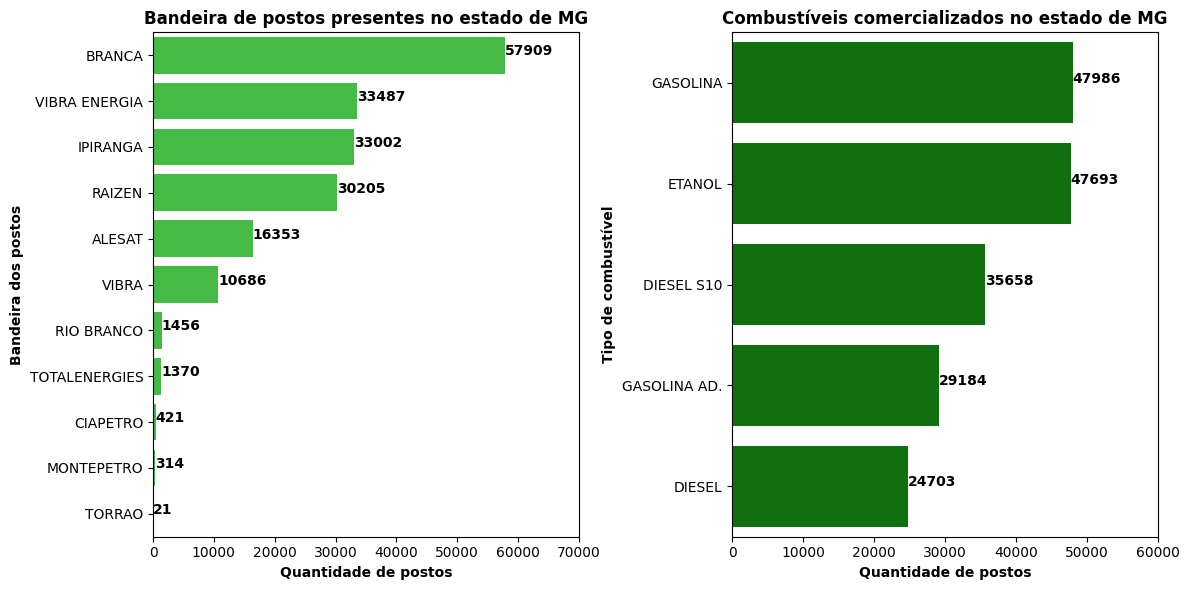

In [18]:
# BARPLOTS
## CRIANDO SUBPLOTS
fig, axs = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(wspace=2)

#------------------------------------------------------------------------------------#
### PLT1
counts = df_fuels['bandeira'].value_counts().sort_values(ascending=False)
sns.barplot(data=counts, orient='h', color='limegreen', ax=axs[0])
for index, val in enumerate(counts.values):
    axs[0].text(val, index, str(val), fontweight='bold')

axs[0].set_xlim(right=70000)
axs[0].set_title('Bandeira de postos presentes no estado de MG', fontweight='bold')
axs[0].set_ylabel('Bandeira dos postos', fontweight='bold')
axs[0].set_xlabel('Quantidade de postos', fontweight='bold')

#------------------------------------------------------------------------------------#
### PLT2
counts2 = df_fuels['tipo_comb'].value_counts().sort_values(ascending=False).rename(index={'GASOLINA ADITIVADA': 'GASOLINA AD.'})
sns.barplot(data=counts2, orient='h', color='green', ax=axs[1])
for index, val in enumerate(counts2.values):
    axs[1].text(val, index, str(val), fontweight='bold')


axs[1].set_xlim(right=60000)
axs[1].set_title('Combustíveis comercializados no estado de MG', fontweight='bold')
axs[1].set_ylabel('Tipo de combustível', fontweight='bold')
axs[1].set_xlabel('Quantidade de postos', fontweight='bold')

#------------------------------------------------------------------------------------#
## PLOT COMPLETO
plt.tight_layout()
plt.show()

In [19]:
# CRIANDO DATAFRAMES PARA PLOT DO MAPA
## CONTAGEM DE MUNICIPIOS
counts_mun = df_fuels['municipio'].value_counts().sort_values(ascending=False)
df_mun = counts_mun.reset_index()

#------------------------------------------------------------------------------------#
## GEODATAFRAMES PARA MAPA
mg_state = gpd.read_file('br_mg.json')
mg_mun = gpd.read_file('geojson_mun_mg.json')
mg_mun.drop(['id', 'description'], axis=1, inplace=True)

### REMOVENDO CARACTERES PARA FACILITAR O MERGE
def rem_pontuacao(pontuation):
    norm = unicodedata.normalize('NFKD', pontuation)
    removed = norm.encode('ascii', 'ignore').decode('ascii')
    return removed

mg_mun['name'] = mg_mun['name'].str.upper()
mg_mun['name'] = mg_mun['name'].apply(rem_pontuacao)

#------------------------------------------------------------------------------------#
## DATAFRAME FINAL PARA PLOT
geo_mg = mg_mun.set_index('name').join(df_mun.set_index('municipio'))
geo_mg['count'] = geo_mg['count'].fillna(0)

### TOP 5 MUNICIPIOS POR QUANTIDADE
top_10 = geo_mg.sort_values(by='count', ascending=False).head(5).reset_index()

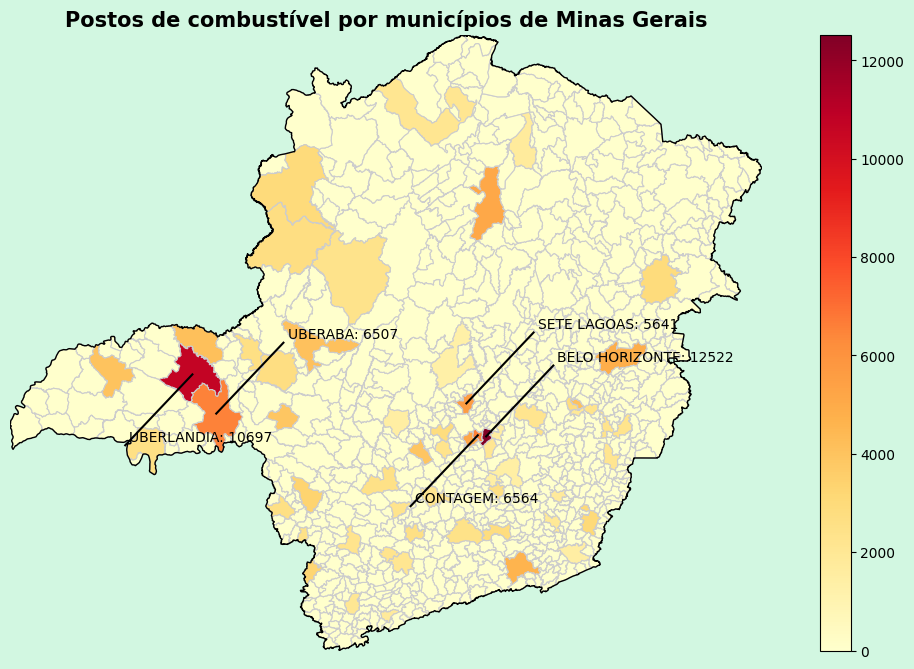

In [21]:
# MAPPLOT
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
fig.patch.set_facecolor('#d2f7e1')
mg_state.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
geo_mg.plot(column='count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

#------------------------------------------------------------------------------------#
## LEGENDA DOS TOP5 ESTADOS
for i, j in top_10.iterrows():
    centro = j['geometry'].centroid
    
    z = random.choice([-1, 1])
    offset_x, offset_y = 1*z, 1*z

    line_end = (centro.x + offset_x, centro.y + offset_y)
    
    ax.plot([centro.x, line_end[0]], [centro.y, line_end[1]], color='black')
    ax.annotate(f"{j['name']}: {j['count']}", xy=line_end, xytext=(3, 3), textcoords="offset points", ha='left')
    
#------------------------------------------------------------------------------------#
## CONFIGURAÇÕES GERAIS
ax.margins(0)
ax.set_axis_off()
ax.set_title('Postos de combustível por municípios de Minas Gerais', fontsize=15, fontweight='bold')

plt.show()

## **Feature Engineering**

In [75]:
dfs['df_diesel'].sample(15)

,estado,municipio,cep,tipo_comb,data,preco,bandeira
202894,MG,UBERLANDIA,38400-672,DIESEL,2022-09-05,6.85,VIBRA ENERGIA
510183,MG,TEOFILO OTONI,39800-307,DIESEL,2022-06-27,7.69,RAIZEN
139137,MG,SAO SEBASTIAO DO PARAISO,37950-000,DIESEL,2023-03-07,5.99,VIBRA ENERGIA
284290,MG,SETE LAGOAS,35700-049,DIESEL,2022-11-08,6.49,BRANCA
18999,MG,IPATINGA,35162-097,DIESEL,2022-01-10,5.35,VIBRA ENERGIA
34505,MG,MURIAE,36880-000,DIESEL,2023-01-18,6.18,IPIRANGA
309006,MG,MONTES CLAROS,39401-474,DIESEL,2023-05-15,5.99,IPIRANGA
33911,MG,GUAXUPE,37800-000,DIESEL,2023-07-12,5.09,BRANCA
139067,MG,PATROCINIO,38740-001,DIESEL,2023-03-09,6.55,IPIRANGA
74377,MG,POCOS DE CALDAS,37701-387,DIESEL,2023-08-03,4.58,BRANCA


In [58]:
## CRIAÇÃO DE COLUNAS REPRESENTATIVAS DO DIA
for df in dfs:
    dfs[df]['preco_medio'] = dfs[df].groupby('data')['preco'].transform('mean')
    dfs[df]['preco_std'] = dfs[df].groupby('data')['preco'].transform('std')
    dfs[df]['preco_min'] = dfs[df].groupby('data')['preco'].transform('min')
    dfs[df]['preco_max'] = dfs[df].groupby('data')['preco'].transform('max')
    dfs[df]['num_postos'] = dfs[df].groupby('data')['cep'].transform('count')

## CONTINUAÇÃO

In [34]:
dfs['GASOLINA']

,estado,municipio,cep,tipo_comb,data,preco,bandeira,preco_medio
254,MG,CONSELHEIRO LAFAIETE,36400-000,GASOLINA,2022-01-03,6.89,BRANCA,7.010568
257,MG,CONSELHEIRO LAFAIETE,36400-000,GASOLINA,2022-01-03,6.97,BRANCA,7.010568
262,MG,CONTAGEM,32185-130,GASOLINA,2022-01-03,6.78,IPIRANGA,7.010568
265,MG,CONTAGEM,32113-340,GASOLINA,2022-01-03,6.89,VIBRA ENERGIA,7.010568
269,MG,CONTAGEM,32110-005,GASOLINA,2022-01-03,6.74,IPIRANGA,7.010568
...,...,...,...,...,...,...,...,...
472300,MG,OLIVEIRA,35540-000,GASOLINA,2023-12-27,5.39,BRANCA,5.463005
472336,MG,VICOSA,36576-178,GASOLINA,2023-12-26,5.79,RAIZEN,5.538414
472343,MG,OLIVEIRA,35540-000,GASOLINA,2023-12-27,5.56,IPIRANGA,5.463005
472388,MG,OLIVEIRA,35540-000,GASOLINA,2023-12-27,5.39,BRANCA,5.463005


In [13]:
cop = df_fuels.copy()

In [14]:
cop['preco_medio'] = cop.groupby(['data', 'tipo_comb'])['preco'].transform('mean')


In [15]:
cop

,estado,municipio,cep,tipo_comb,data,preco,bandeira,preco_medio
254,MG,CONSELHEIRO LAFAIETE,36400-000,GASOLINA,2022-01-03,6.89,BRANCA,7.010568
255,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,2022-01-03,5.19,BRANCA,5.322093
256,MG,CONSELHEIRO LAFAIETE,36400-000,DIESEL S10,2022-01-03,5.30,BRANCA,5.408939
257,MG,CONSELHEIRO LAFAIETE,36400-000,GASOLINA,2022-01-03,6.97,BRANCA,7.010568
258,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,2022-01-03,5.23,BRANCA,5.322093
...,...,...,...,...,...,...,...,...
472389,MG,OLIVEIRA,35540-000,DIESEL,2023-12-27,5.99,BRANCA,5.744609
472390,MG,OLIVEIRA,35540-000,DIESEL S10,2023-12-27,6.19,BRANCA,5.888146
472391,MG,OLIVEIRA,35540-000,ETANOL,2023-12-27,3.47,BRANCA,3.482689
472409,MG,UBA,36500-012,GASOLINA,2023-12-28,5.29,RAIZEN,5.533488


In [27]:
df_uniq = df_fuels.drop_duplicates(subset=['data', 'preco_medio'])
df_uniq

,estado,municipio,cep,tipo_comb,data,preco,bandeira,preco_medio
254,MG,CONSELHEIRO LAFAIETE,36400-000,GASOLINA,2022-01-03,6.89,BRANCA,7.010568
255,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,2022-01-03,5.19,BRANCA,5.322093
256,MG,CONSELHEIRO LAFAIETE,36400-000,DIESEL S10,2022-01-03,5.30,BRANCA,5.408939
259,MG,CONSELHEIRO LAFAIETE,36400-000,DIESEL,2022-01-03,5.32,BRANCA,5.330222
260,MG,CONSELHEIRO LAFAIETE,36400-000,GASOLINA ADITIVADA,2022-01-03,6.97,BRANCA,7.133400
...,...,...,...,...,...,...,...,...
455629,MG,CONTAGEM,32017-390,GASOLINA ADITIVADA,2023-12-29,5.25,IPIRANGA,5.758621
455630,MG,CONTAGEM,32017-390,DIESEL,2023-12-29,5.48,IPIRANGA,5.874545
455631,MG,CONTAGEM,32017-390,DIESEL S10,2023-12-29,5.58,IPIRANGA,6.015000
455632,MG,CONTAGEM,32017-390,ETANOL,2023-12-29,3.16,IPIRANGA,3.445366


In [32]:
combs = df_uniq['tipo_comb'].unique()
dfs = {}
for k in combs:
    dfs[k] = df_uniq[df_uniq['tipo_comb']==k].copy()

In [40]:
dfs['ETANOL']

,estado,municipio,cep,tipo_comb,data,preco,bandeira,preco_medio
255,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,2022-01-03,5.19,BRANCA,5.322093
4666,MG,ALFENAS,37132-393,ETANOL,2022-01-04,5.49,BRANCA,5.330513
10605,MG,BARBACENA,36200-372,ETANOL,2022-01-05,4.93,TOTALENERGIES,5.159517
15944,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,2022-01-06,5.29,VIBRA ENERGIA,5.242297
18956,MG,CONSELHEIRO LAFAIETE,36401-174,ETANOL,2022-01-10,5.22,BRANCA,5.322340
...,...,...,...,...,...,...,...,...
455477,MG,ALFENAS,37130-027,ETANOL,2023-12-27,3.39,BRANCA,3.482689
455485,MG,ALFENAS,37135-232,ETANOL,2023-12-28,3.23,BRANCA,3.520120
455492,MG,BARBACENA,36202-370,ETANOL,2023-12-26,3.39,RAIZEN,3.501087
455496,MG,BARBACENA,36200-078,ETANOL,2023-12-25,3.39,RAIZEN,3.401935


In [41]:
etano = dfs['ETANOL'].set_index('data')

In [43]:
etano = etano.resample('B').ffill()

In [47]:
etano.reset_index(inplace=True)
etano

,data,estado,municipio,cep,tipo_comb,preco,bandeira,preco_medio
0,2022-01-03,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,5.19,BRANCA,5.322093
1,2022-01-04,MG,ALFENAS,37132-393,ETANOL,5.49,BRANCA,5.330513
2,2022-01-05,MG,BARBACENA,36200-372,ETANOL,4.93,TOTALENERGIES,5.159517
3,2022-01-06,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,5.29,VIBRA ENERGIA,5.242297
4,2022-01-07,MG,CONSELHEIRO LAFAIETE,36400-000,ETANOL,5.29,VIBRA ENERGIA,5.242297
...,...,...,...,...,...,...,...,...
515,2023-12-25,MG,BARBACENA,36200-078,ETANOL,3.39,RAIZEN,3.401935
516,2023-12-26,MG,BARBACENA,36202-370,ETANOL,3.39,RAIZEN,3.501087
517,2023-12-27,MG,ALFENAS,37130-027,ETANOL,3.39,BRANCA,3.482689
518,2023-12-28,MG,ALFENAS,37135-232,ETANOL,3.23,BRANCA,3.520120


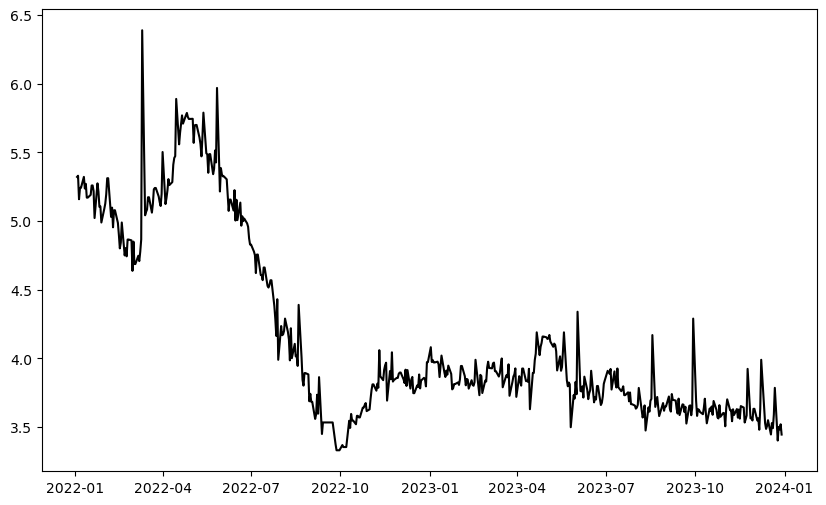

In [49]:
#mask = df_fuels['tipo_comb'] == 'GASOLINA'
plt.figure(figsize=(10,6))
plt.plot(etano['data'], etano['preco_medio'], c='black')

### Continuação

In [15]:
df_fuels.sample(5)

,estado,municipio,cep,tipo_comb,data,preco,bandeira
528345,MG,UNAI,38610-000,DIESEL,2022-06-30,7.79,IPIRANGA
238598,MG,BELO HORIZONTE,30870-100,DIESEL S10,2022-09-26,6.99,VIBRA ENERGIA
215969,MG,UBA,36500-000,GASOLINA ADITIVADA,2022-03-21,7.59,BRANCA
87141,MG,OLIVEIRA,35540-000,DIESEL,2023-02-09,6.09,BRANCA
387898,MG,BETIM,32689-898,GASOLINA ADITIVADA,2022-05-17,7.69,IPIRANGA


In [16]:
plt.figure(figsize=(10, 6))
plt.bar(df_fuels['tipo_comb'], df_fuels['preco'], color='skyblue')
plt.xlabel('Fuel Type')
plt.ylabel('Price ($)')
plt.title('Fuel Prices')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001ADF7F1F4C0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001AD8B98E840> (for post_execute):


KeyboardInterrupt: 

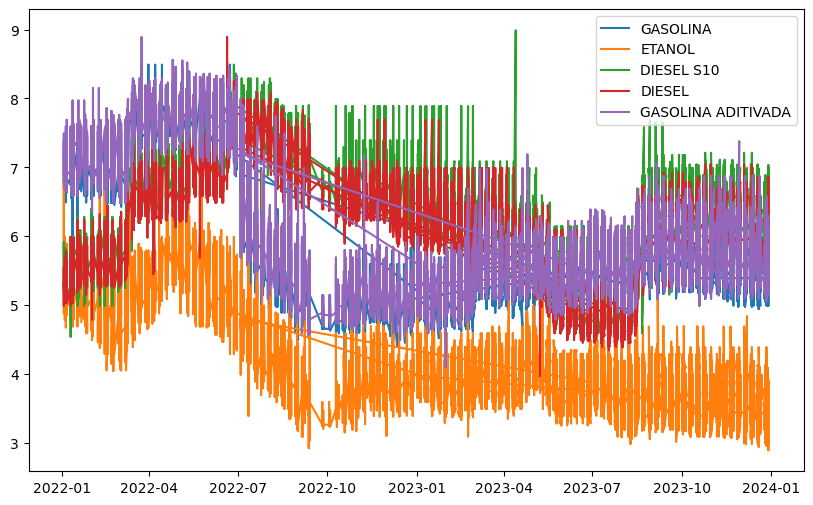

In [18]:
plt.figure(figsize=(10, 6))
for tipo in df_fuels['tipo_comb'].unique():
    data = df_fuels[df_fuels['tipo_comb'] == tipo]
    plt.plot(data['data'], data['preco'], label=tipo)
plt.legend()

In [ ]:
combustiveis = df_fuels['tipo_comb'].unique()
fig, axes = plt.subplots(nrows=len(combustiveis), ncols=1, figsize=(10, 6), sharex=True)
for i, tipo in enumerate(combustiveis):
    data = df_fuels[df_fuels['tipo_comb'] == tipo]
    axes[i].plot(data['data'], data['preco'], label=tipo)
    axes[i].set_ylabel('Preço (R$)')
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.xlabel('Data')

In [ ]:
df_fuels['preco_medio'] = df_fuels.groupby(['data', 'tipo_comb'])['preco'].transform('mean')

In [ ]:
mask = df_fuels['tipo_comb'] == 'GASOLINA'
plt.figure(figsize=(10,6))
plt.plot(df_fuels.loc[mask, 'data'], df_fuels.loc[mask, 'preco_medio'], c='black', linestyle='dotted')

In [419]:
a = df_fuels[df_fuels['tipo_comb'] == 'GASOLINA']
a.shape

(45925, 8)

### TESTES

In [430]:
#start_date = datetime(2022, 1, 1)
#end_date = datetime(2023, 11, 30)
#data_ini = start

#a.loc[(a['data']>='2022-01-01') & (a['data'] <= '2022-01-31')]['data'].value_counts().sort_index()

#while data_ini <= end:
#    data_fin = (data_ini + timedelta(days=31)).replace(day=1) - timedelta(days=1)
#    a.loc[(a['data']>=data_ini) & (a['data'] <= data_fin)]['data'].value_counts().sort_index()
#    data_ini = (data_fin + timedelta(days=1)).replace(day=1)

#a.loc[(a['data']>=data_inicio) & (a['data'] <= data_fim)]['data'].value_counts().sort_index()

In [437]:
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 11, 30)

periodo = pd.date_range(start=start_date, end=end_date, freq='D')
datas_df = pd.DataFrame({'data': periodo})

In [438]:
datas_faltantes = datas_df.merge(df_fuels, on='data', how='left', suffixes=['', '_'], indicator=True)

In [444]:
a = datas_faltantes['data'].loc[datas_faltantes['_merge'] == 'left_only']

In [450]:
a.tolist()

[Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-01-02 00:00:00'),
 Timestamp('2022-01-07 00:00:00'),
 Timestamp('2022-01-08 00:00:00'),
 Timestamp('2022-01-09 00:00:00'),
 Timestamp('2022-01-14 00:00:00'),
 Timestamp('2022-01-15 00:00:00'),
 Timestamp('2022-01-16 00:00:00'),
 Timestamp('2022-01-22 00:00:00'),
 Timestamp('2022-01-23 00:00:00'),
 Timestamp('2022-01-29 00:00:00'),
 Timestamp('2022-01-30 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-05 00:00:00'),
 Timestamp('2022-02-06 00:00:00'),
 Timestamp('2022-02-11 00:00:00'),
 Timestamp('2022-02-12 00:00:00'),
 Timestamp('2022-02-13 00:00:00'),
 Timestamp('2022-02-19 00:00:00'),
 Timestamp('2022-02-20 00:00:00'),
 Timestamp('2022-02-25 00:00:00'),
 Timestamp('2022-02-26 00:00:00'),
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-03-04 00:00:00'),
 Timestamp('2022-03-05 00:00:00'),
 Timestamp('2022-03-06 00:00:00'),
 Timestamp('2022-03-12 00:00:00'),
 Timestamp('2022-03-13 00:00:00'),
 Timestamp('2022-03-

In [442]:
a['data'].sort_values().unique()
#for i in a['data'].sort_values().unique():
#    print(i)

<DatetimeArray>
['2022-01-03 00:00:00', '2022-01-04 00:00:00', '2022-01-05 00:00:00',
 '2022-01-06 00:00:00', '2022-01-10 00:00:00', '2022-01-11 00:00:00',
 '2022-01-12 00:00:00', '2022-01-13 00:00:00', '2022-01-17 00:00:00',
 '2022-01-18 00:00:00',
 ...
 '2023-11-17 00:00:00', '2023-11-20 00:00:00', '2023-11-21 00:00:00',
 '2023-11-22 00:00:00', '2023-11-23 00:00:00', '2023-11-24 00:00:00',
 '2023-11-27 00:00:00', '2023-11-28 00:00:00', '2023-11-29 00:00:00',
 '2023-11-30 00:00:00']
Length: 450, dtype: datetime64[ns]

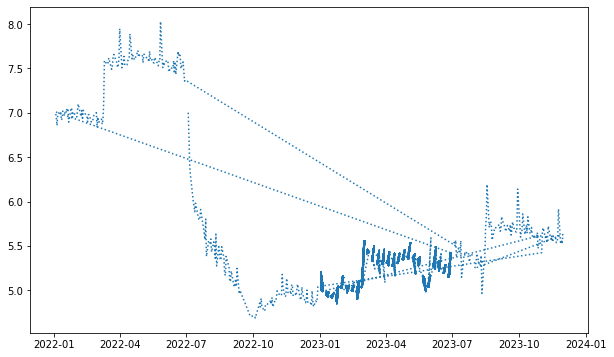

In [420]:
plt.figure(figsize=(10,6))
plt.plot(a['data'], a['preco_medio'], linestyle='dotted')

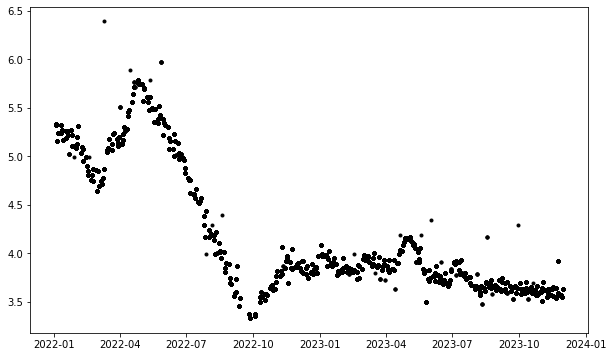

In [421]:
mask = df_fuels['tipo_comb'] == 'ETANOL'
plt.figure(figsize=(10,6))
plt.scatter(df_fuels.loc[mask, 'data'], df_fuels.loc[mask, 'preco_medio'], marker='.', c='black')

In [273]:
df_fuels.loc[mask, 'preco_medio']

13195    5.449348
13199    5.449348
13203    5.449348
13207    5.449348
13211    5.449348
           ...   
53079    3.763333
53081    3.763333
53084    3.763333
53087    3.763333
53090    3.763333
Name: preco_medio, Length: 4596, dtype: float64

Text(0.5, 32.99999999999995, 'Data')

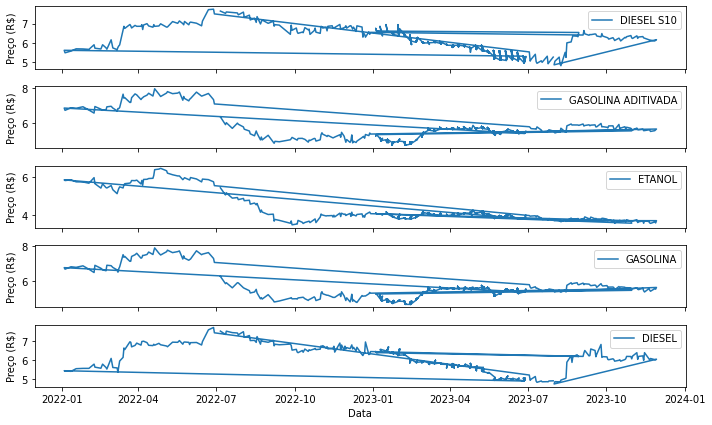

In [263]:
#combustiveis = df_fuels['tipo_comb'].unique()
#fig, axes = plt.subplots(nrows=len(combustiveis), ncols=1, figsize=(10, 6), sharex=True)
#for i, tipo in enumerate(combustiveis):
#    data = df_fuels[df_fuels['tipo_comb'] == tipo]
#    axes[i].plot(data['data'], data['preco_medio'], label=tipo)
#    axes[i].set_ylabel('Preço (R$)')
#    axes[i].legend()

#plt.tight_layout(rect=[0, 0, 1, 0.97])
#plt.xlabel('Data')